# Top 10 movies analysis


In [16]:
import sys
sys.path.append('..')


In [17]:
from lib.types.source_type import SourceType
from lib.types.dataset_type import DatasetType
from lib.services.seaborn_service import SeabornService

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv(DatasetType.movies_metadata.cleaned_path())

df.head(5)


,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
0,30000000,862,21.946943,373554033.0,81.0,Toy Story,7.7,5415,16|35|10751,Animation|Comedy|Family,Toy Story Collection,10194.0,Animation,Comedy,Family,Animation,3.598930,862
1,65000000,8844,17.015539,262797249.0,104.0,Jumanji,6.9,2413,12|14|10751,Adventure|Fantasy|Family,NaN,NaN,Adventure,Fantasy,Family,Adventure,3.760163,8844
2,0,15602,11.712900,0.0,101.0,Grumpier Old Men,6.5,92,10749|35,Romance|Comedy,Grumpy Old Men Collection,119050.0,Romance,Comedy,Romance,Romance,0.000000,0
3,16000000,31357,3.859495,81452156.0,127.0,Waiting to Exhale,6.1,34,35|18|10749,Comedy|Drama|Romance,NaN,NaN,Comedy,Drama,Romance,Comedy,0.000000,0
4,0,11862,8.387519,76578911.0,106.0,Father of the Bride Part II,5.7,173,35,Comedy,Father of the Bride Collection,96871.0,Comedy,Comedy,Comedy,Comedy,0.000000,0


## Top 10 movies based on popularity


In [19]:
top_popular_movies = df.sort_values(by=['popularity'], ascending=False)

top_10_popular_movies = top_popular_movies.head(10)

top_10_popular_movies


,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
30698,74000000,211672,547.488298,1.156731e+09,91.0,Minions,6.4,4729,10751|16|12|35,Family|Animation|Adventure|Comedy,Despicable Me Collection,86066.0,Family,Animation,Adventure,Comedy,0.0,0
33354,149000000,297762,294.337037,8.205804e+08,141.0,Wonder Woman,7.2,5025,28|12|14,Action|Adventure|Fantasy,Wonder Woman Collection,468552.0,Action,Adventure,Fantasy,Action,0.0,0
42219,160000000,321612,287.253654,1.262886e+09,129.0,Beauty and the Beast,6.8,5530,10751|14|10749,Family|Fantasy|Romance,NaN,NaN,Family,Fantasy,Romance,Family,0.0,0
43641,34000000,339403,228.032744,2.245113e+08,113.0,Baby Driver,7.2,2083,28|80,Action|Crime,NaN,NaN,Action,Crime,Action,Action,0.0,0
24454,165000000,177572,213.849907,6.521054e+08,102.0,Big Hero 6,7.8,6289,12|10751|16|28|35,Adventure|Family|Animation|Action|Comedy,NaN,NaN,Adventure,Family,Animation,Action,0.0,0
26563,58000000,293660,187.860492,7.831130e+08,108.0,Deadpool,7.4,11444,28|12|35,Action|Adventure|Comedy,Deadpool Collection,448150.0,Action,Adventure,Comedy,Action,0.0,0
26565,200000000,283995,185.330992,8.634161e+08,137.0,Guardians of the Galaxy Vol. 2,7.6,4858,28|12|35|878,Action|Adventure|Comedy|Science Fiction,Guardians of the Galaxy Collection,284433.0,Action,Adventure,Comedy,Science Fiction,0.0,0
14551,237000000,19995,185.070892,2.787965e+09,162.0,Avatar,7.2,12114,28|12|14|878,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,87096.0,Action,Adventure,Fantasy,Science Fiction,0.0,0
24350,20000000,245891,183.870374,8.876166e+07,101.0,John Wick,7.0,5499,28|53,Action|Thriller,John Wick Collection,404609.0,Action,Thriller,Action,Action,0.0,0
23674,61000000,210577,154.801009,3.693304e+08,145.0,Gone Girl,7.9,6023,9648|53|18,Mystery|Thriller|Drama,NaN,NaN,Mystery,Thriller,Drama,Mystery,0.0,0


<AxesSubplot:xlabel='popularity', ylabel='title'>

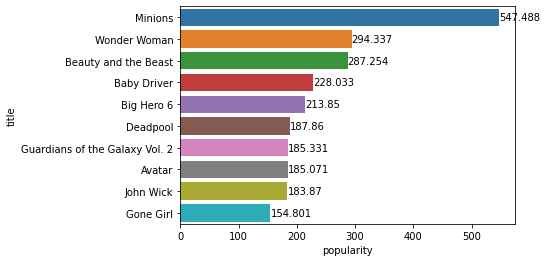

In [20]:
SeabornService(x=top_10_popular_movies['popularity'],
               y=top_10_popular_movies['title'], file_name='top_10_popular_movies').render()


## Top 10 movies based on vote average


In [21]:
top_avg_vote_movies = df.sort_values(by=['vote_average'], ascending=True)

top_10_vote_avg_movies = top_avg_vote_movies.head(10)


<AxesSubplot:xlabel='vote_average', ylabel='title'>

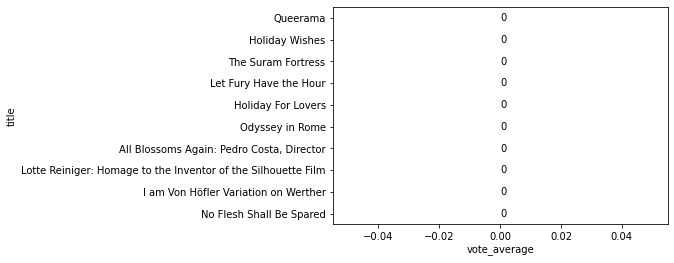

In [22]:
SeabornService(x=top_10_vote_avg_movies['vote_average'],
               y=top_10_vote_avg_movies['title'], file_name='top_10_vote_avg_movies').render()


## Top 10 movies based on profit

%profit = [(revenue-budget)/budget]\*100


In [23]:
cleaned_budget_df = df[df["budget"] > 5000]
cleaned_revenue_df = cleaned_budget_df[cleaned_budget_df['revenue'] != 0]
profit_percentage = cleaned_revenue_df.assign(
    profit=lambda row: ((row['revenue'] - row['budget'])/row['budget'])*100)

top_10_profit_movies = profit_percentage.sort_values(
    by=['profit'], ascending=False).head(10)

top_10_profit_movies


,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity,profit
14192,15000,23827,12.706424,193355800.0,86.0,Paranormal Activity,5.9,1351,27|9648,Horror|Mystery,Paranormal Activity Collection,41437.0,Horror,Mystery,Horror,Horror,0.000000,0,1.288939e+06
2595,60000,2667,14.838386,248000000.0,81.0,The Blair Witch Project,6.3,1090,27|9648,Horror|Mystery,Blair Witch Collection,64750.0,Horror,Mystery,Horror,Horror,2.602881,2667,4.132333e+05
3554,10000,985,7.871001,7000000.0,89.0,Eraserhead,7.5,500,18|14|27|878,Drama|Fantasy|Horror|Science Fiction,NaN,NaN,Drama,Fantasy,Horror,Science Fiction,3.419355,985,6.990000e+04
4316,130000,9462,11.116474,85000000.0,100.0,The Way of the Dragon,7.4,235,28|80,Action|Crime,NaN,NaN,Action,Crime,Action,Action,0.000000,0,6.528462e+04
2248,12000,692,5.738871,6000000.0,93.0,Pink Flamingos,6.2,111,27|35|80,Horror|Comedy|Crime,NaN,NaN,Horror,Comedy,Crime,Horror,2.340671,692,4.990000e+04
7788,65000,9372,5.266103,28575078.0,100.0,Super Size Me,6.6,520,99|35|18,Documentary|Comedy|Drama,Super Size Me Collection,475802.0,Documentary,Comedy,Drama,Documentary,0.000000,0,4.386166e+04
31626,100000,299245,7.515050,42664410.0,87.0,The Gallows,4.9,370,27|53,Horror|Thriller,NaN,NaN,Horror,Thriller,Horror,Horror,0.000000,0,4.256441e+04
9461,130000,83,10.652818,54667954.0,79.0,Open Water,5.3,320,18|53,Drama|Thriller,Open Water Collection,86113.0,Drama,Thriller,Drama,Drama,3.649109,83,4.195227e+04
2346,85000,30497,15.526413,30859000.0,83.0,The Texas Chain Saw Massacre,7.1,617,27,Horror,Texas Chainsaw Massacre Collection,111751.0,Horror,Horror,Horror,Horror,0.000000,0,3.620471e+04
1909,858000,3170,13.698132,267447150.0,70.0,Bambi,6.8,1450,16|18|10751,Animation|Drama|Family,Bambi Collection,87250.0,Animation,Drama,Family,Animation,2.208333,3170,3.107100e+04


<AxesSubplot:xlabel='profit', ylabel='title'>

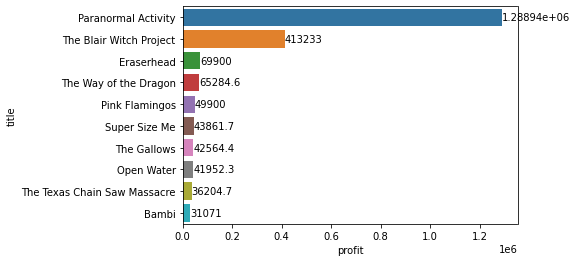

In [24]:
SeabornService(x=top_10_profit_movies['profit'], y=top_10_profit_movies['title'],
               file_name='top_10_profit_movies').render()


## Top 10 movies based on vote count


In [25]:
top_vote_count_movies = df.sort_values(by=['vote_count'], ascending=False)

top_10_vote_count_movies = top_vote_count_movies.head(10)


<AxesSubplot:xlabel='vote_count', ylabel='title'>

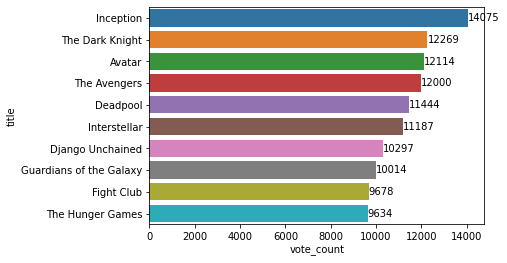

In [26]:
SeabornService(x=top_10_vote_count_movies['vote_count'], y=top_10_vote_count_movies['title'],
               file_name='top_10_vote_count_movies').render()


## Top 10 based on average rating


In [27]:
# sort both avg_rating and quantity
top_avg_quan_movies = df.sort_values(
    by=['avg_rating', 'quantity'], ascending=False)

top_10_rating_movies = top_avg_quan_movies.head(10)

top_10_rating_movies


,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
20665,0,173153,4.657956,0.0,92.0,Phil Spector,5.9,37,10770|18,TV Movie|Drama,NaN,NaN,TV Movie,Drama,TV Movie,TV Movie,5.0,173153
17720,0,172149,1.351087,0.0,106.0,Burning Secret,5.3,4,18,Drama,NaN,NaN,Drama,Drama,Drama,Drama,5.0,172149
38615,0,169726,0.071845,0.0,103.0,The Gypsy and the Gentleman,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,169726
43730,0,167666,2.341218,0.0,45.0,Monster High: Escape from Skull Shores,6.3,7,16|10751|14,Animation|Family|Fantasy,Monster High Collection,224026.0,Animation,Family,Fantasy,Animation,5.0,167666
34421,0,166231,0.492298,0.0,207.0,Refugee,5.5,5,18|10402|10749,Drama|Music|Romance,NaN,NaN,Drama,Music,Romance,Drama,5.0,166231
36528,0,166225,0.073323,0.0,174.0,Khel,5.0,1,28|53,Action|Thriller,NaN,NaN,Action,Thriller,Action,Action,5.0,166225
22517,0,164278,0.143493,0.0,120.0,Harvey,0.0,0,14,Fantasy,NaN,NaN,Fantasy,Fantasy,Fantasy,Fantasy,5.0,164278
45128,0,160329,0.079980,0.0,5.0,Lightheaded,7.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,160329
25176,0,146946,1.231331,0.0,89.0,Yellow Rock,4.6,5,37,Western,NaN,NaN,Western,Western,Western,Western,5.0,146946
32175,0,137853,0.209749,0.0,88.0,Journey to Planet X,9.0,1,99,Documentary,NaN,NaN,Documentary,Documentary,Documentary,Documentary,5.0,137853


20665                              Phil Spector
17720                            Burning Secret
38615               The Gypsy and the Gentleman
43730    Monster High: Escape from Skull Shores
34421                                   Refugee
36528                                      Khel
22517                                    Harvey
45128                               Lightheaded
25176                               Yellow Rock
32175                       Journey to Planet X
Name: title, dtype: object

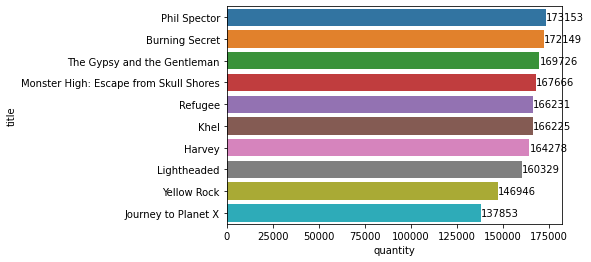

In [28]:
SeabornService(x=top_10_rating_movies['quantity'], y=top_10_rating_movies['title'],
               file_name='top_10_rating_movies').render()
top_10_rating_movies['title']


## Top 10 movies based on revenue


In [29]:
top_revenue_movies = df.sort_values(by=['revenue'], ascending=False)

top_10_revenue_movies = top_revenue_movies.head(10)

top_10_revenue_movies


,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genre_ids,genres,btc_name,btc_id,genres1,genres2,genres3,genres4,avg_rating,quantity
14551,237000000,19995,185.070892,2.787965e+09,162.0,Avatar,7.2,12114,28|12|14|878,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,87096.0,Action,Adventure,Fantasy,Science Fiction,0.000000,0
26554,245000000,140607,31.626013,2.068224e+09,136.0,Star Wars: The Force Awakens,7.5,7993,28|12|878|14,Action|Adventure|Science Fiction|Fantasy,Star Wars Collection,10.0,Action,Adventure,Science Fiction,Fantasy,0.000000,0
1639,200000000,597,26.889070,1.845034e+09,194.0,Titanic,7.5,7770,18|10749|53,Drama|Romance|Thriller,NaN,NaN,Drama,Romance,Thriller,Drama,3.429515,597
17818,220000000,24428,89.887648,1.519558e+09,143.0,The Avengers,7.4,12000,878|28|12,Science Fiction|Action|Adventure,The Avengers Collection,86311.0,Science Fiction,Action,Adventure,Science Fiction,0.000000,0
25083,150000000,135397,32.790475,1.513529e+09,124.0,Jurassic World,6.5,8842,28|12|878|53,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,328.0,Action,Adventure,Science Fiction,Thriller,0.000000,0
28829,190000000,168259,27.275687,1.506249e+09,137.0,Furious 7,7.3,4253,28,Action,The Fast and the Furious Collection,9485.0,Action,Action,Action,Action,0.000000,0
26557,280000000,99861,37.379420,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,6908,28|12|878,Action|Adventure|Science Fiction,The Avengers Collection,86311.0,Action,Adventure,Science Fiction,Action,3.296296,99861
17437,125000000,12445,24.990737,1.342000e+09,130.0,Harry Potter and the Deathly Hallows: Part 2,7.9,6141,10751|14|12,Family|Fantasy|Adventure,Harry Potter Collection,1241.0,Family,Fantasy,Adventure,Family,0.000000,0
22109,150000000,109445,24.248243,1.274219e+09,102.0,Frozen,7.3,5440,16|12|10751,Animation|Adventure|Family,Frozen Collection,386382.0,Animation,Adventure,Family,Animation,0.000000,0
42219,160000000,321612,287.253654,1.262886e+09,129.0,Beauty and the Beast,6.8,5530,10751|14|10749,Family|Fantasy|Romance,NaN,NaN,Family,Fantasy,Romance,Family,0.000000,0


<AxesSubplot:xlabel='revenue', ylabel='title'>

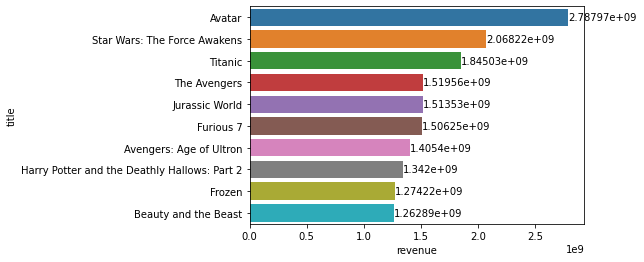

In [30]:
SeabornService(x=top_10_revenue_movies['revenue'], y=top_10_revenue_movies['title'],
               file_name='top_10_revenue_movies').render()
